In [41]:
import os
import time
import subprocess
import math
import fileinput
import sys
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse
import datetime
from scipy.optimize import curve_fit
from scipy import ndimage

import ana_connie_lib as ana

plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    })

nCCDs=16

# define active and overscan masks
active_mask = np.s_[:, 10:1057] # 
overscan_mask = np.s_[:, -91:-1] 

In [42]:
file="/home/oem/datosFits/mcm_data/ansamp/fits/MCM1_Demuxed_Test_barrido_ANSAMP_exp_1s_ignorando_2muestras_ANSAMP1_18.fits"
OHDU_File = fits.open(file)

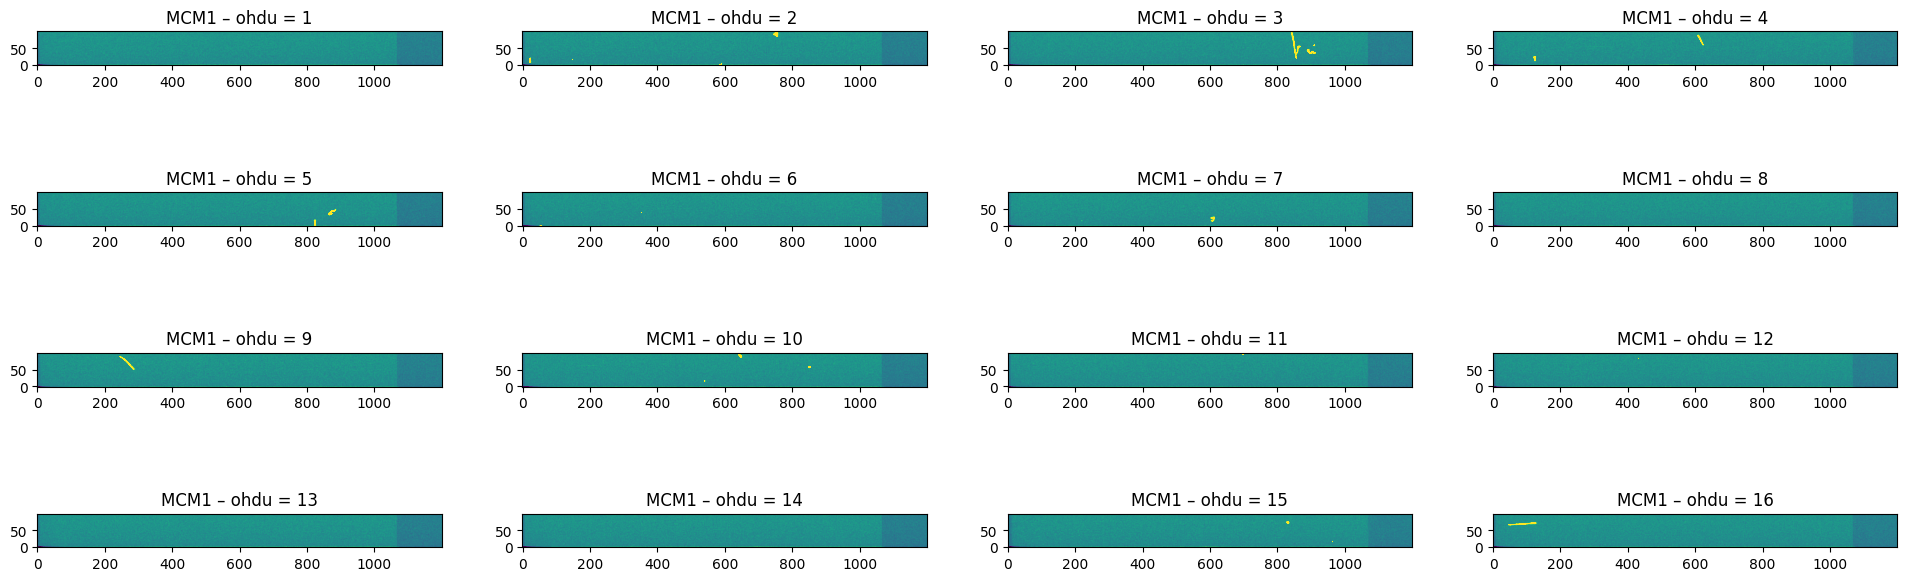

In [43]:
plt.figure(figsize=(24,8))
for i in range(nCCDs):
    plt.subplot(4,4,i+1)
    plt.imshow(OHDU_File[i+1].data[:,:]-np.median(OHDU_File[i+1].data), vmin=-100, vmax=100) # media sustracted
    plt.title('MCM1 – ohdu = {:d}'.format(i+1))

# Data procceced

median raw [1]= 24863.0
median [0]= 24919.000000
median [1]= 25173.000000
median [2]= 25337.000000
median [3]= 25559.000000
median [4]= 24588.000000
median [5]= 24888.000000
median [6]= 25167.000000
median [7]= 25280.000000
median [8]= 24251.000000
median [9]= 24616.000000
median [10]= 24907.000000
median [11]= 25134.000000
median [12]= 23898.000000
median [13]= 24203.000000
median [14]= 24427.000000
median [15]= 24858.000000
ansamp= 1


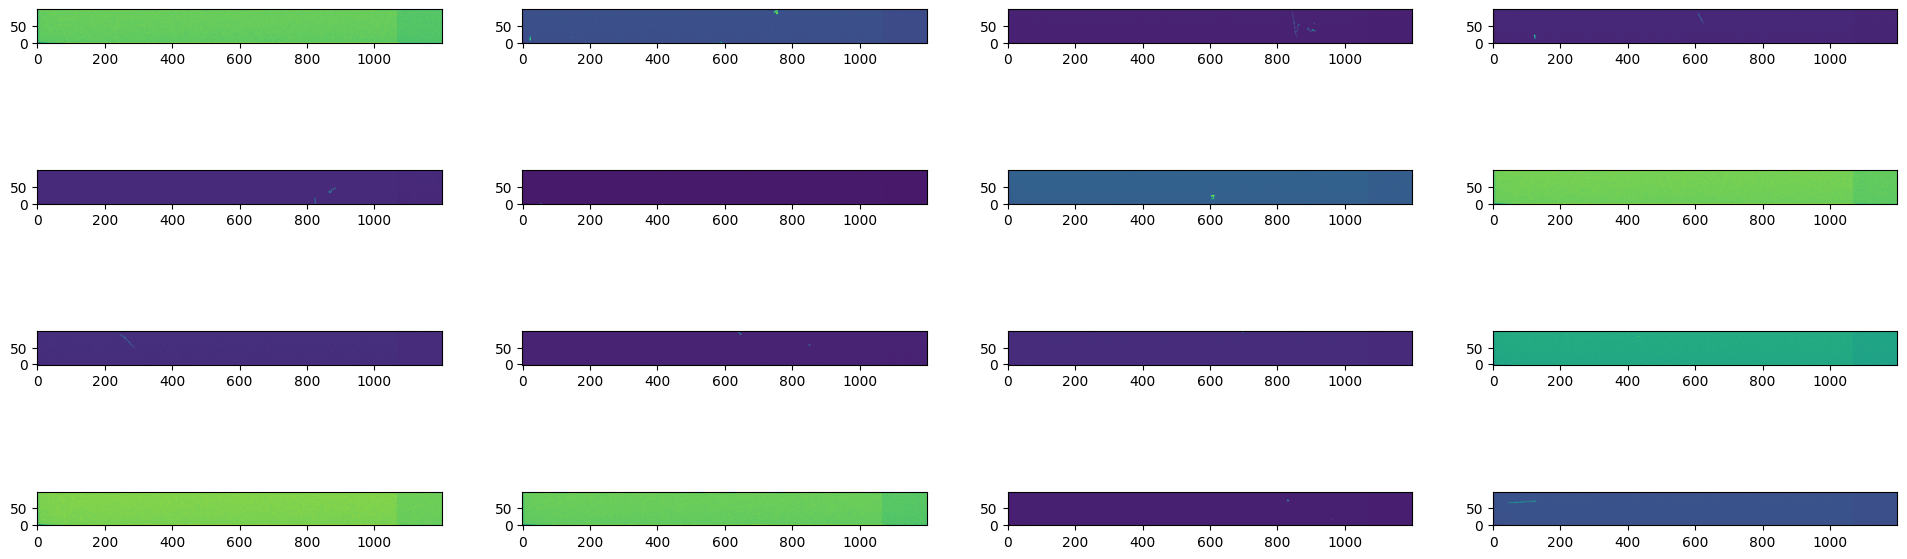

In [44]:
OHDU_Proc = (OHDU_File[1].data[active_mask]-np.median(OHDU_File[1].data[active_mask]))
print("median raw [1]= "+ str(np.median(OHDU_File[i+1].data)) )
plt.figure(figsize=(24,8))
for i in range(nCCDs):
    
    plt.subplot(4,4,i+1)
    #dataFits=(OHDU_File[1+i].data[active_mask])-np.median(OHDU_File[i+1].data[active_mask])
    dataFits=OHDU_File[1+i].data
    print("median [{:d}]= {:f}".format(i,np.median(dataFits[i+1].data)))
    plt.imshow(dataFits)#, vmin=-50, vmax=100) # media sustracted
    # plt.title('MCM1 – ohdu = {:d}'.format(i+1))

print("ansamp= "+OHDU_File[1].header['ANSAMP'])

# Test Function at the same region
## capable to customize title, histogram and fit parameters

In [45]:
ANSAMP=int(OHDU_File[1].header["ANSAMP"])
dataFits_AA=dataFits[active_mask]/ANSAMP
dataFits_OS=dataFits[overscan_mask]/ANSAMP

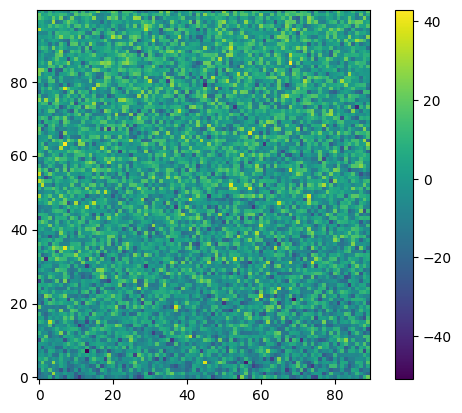

In [46]:
plt.imshow(dataFits_OS-np.median(dataFits_OS))#AA-np.median(dataFits_AA))
plt.colorbar()

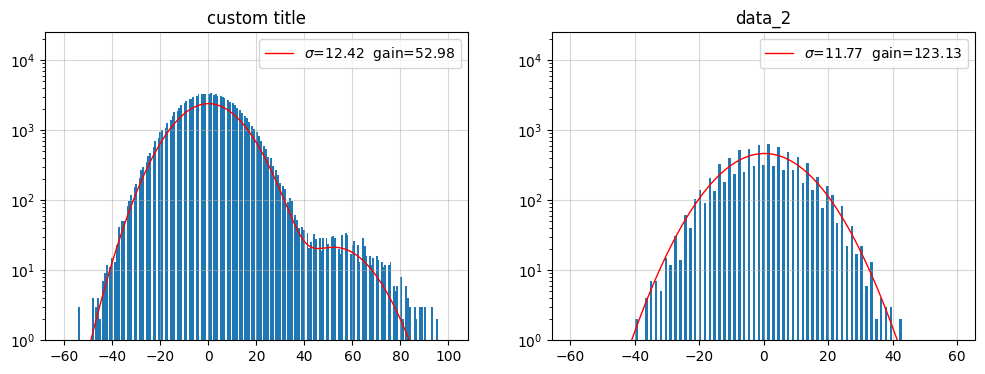

'ok'

In [61]:

ana.fit2regions(dataFits_AA-np.median(dataFits_AA), dataFits_OS-np.median(dataFits_OS), range_1=(-60,100),range_2=(-60,60),default_1=(0,4,1000,50,100), title_1="custom title")

> ### From the top
> - open file
> - choose ext
> - set ANSAMP Value
> - sustract median and divide by ANSAMP
> - compare 2 regions

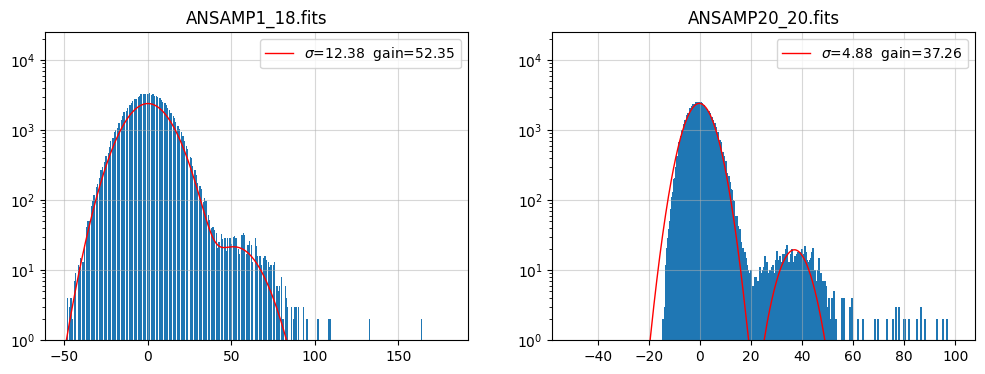

'ok'

In [48]:
file_1="/home/oem/datosFits/mcm_data/ansamp/fits/MCM1_Demuxed_Test_barrido_ANSAMP_exp_1s_ignorando_2muestras_ANSAMP1_18.fits"
OHDU_File_1 = fits.open(file_1)

file_2="/home/oem/datosFits/mcm_data/ansamp/fits/MCM1_Demuxed_Test_barrido_ANSAMP_exp_1s_ignorando_2muestras_ANSAMP20_20.fits"
OHDU_File_2 = fits.open(file_2)

ext_1=16
ext_2=3

try:
    ANSAMP_1 = int(OHDU_File_1[1].header["ANSAMP"])
except:
    print("Not ANSAMP card detected on File 1")
    ANSAMP_1=1
try:
    ANSAMP_2 = int(OHDU_File_2[1].header["ANSAMP"])
except:
    print("Not ANSAMP card detected on File 1")
    ANSAMP_2=1


dataFits_1=(OHDU_File_1[ext_1].data[active_mask])-np.median(OHDU_File_1[ext_1].data[active_mask])/ANSAMP_1
dataFits_10=((OHDU_File_2[ext_2].data[active_mask])-np.median(OHDU_File_2[ext_2].data[active_mask]))/ANSAMP_2



ana.fit2regions(dataFits_1, dataFits_10,range_1=(-50,180), range_2=(-50,100),default_2=[0,8,1000,40,200],title_1="ANSAMP1_18.fits", title_2="ANSAMP20_20.fits",saveFig=False)

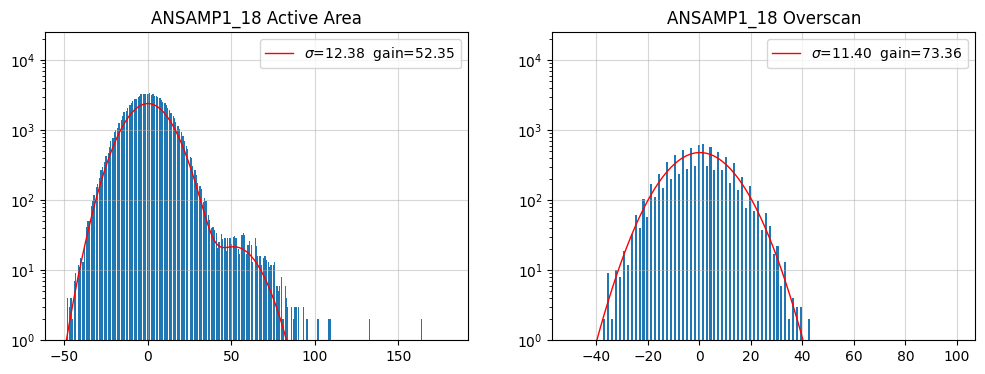

'ok'

In [49]:
ana.fit2regions(dataFits_1, OHDU_File_1[ext_1].data[overscan_mask]-np.median(OHDU_File_1[ext_1].data[overscan_mask]),range_1=(-50,180), range_2=(-50,100),title_1="ANSAMP1_18 Active Area", title_2="ANSAMP1_18 Overscan",saveFig=False)

# Trying to mask events

In [50]:
from scipy.ndimage import label as label
from numpy.ma import make_mask as masking
from numpy.ma import masked_array as enmascarado
from scipy import ndimage

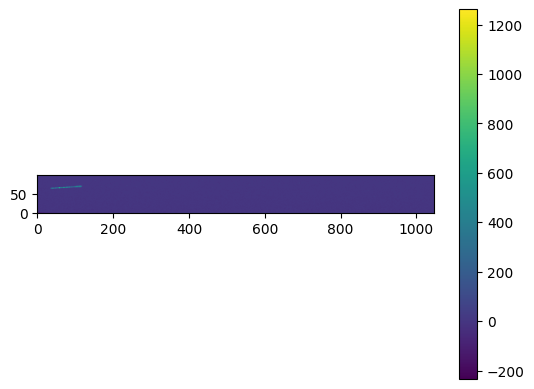

In [51]:
plt.imshow(dataFits_1)
plt.colorbar()

In [52]:
label_1=label(dataFits_1>100,structure=[[1,1,1],[1,1,1],[1,1,1]])[0]

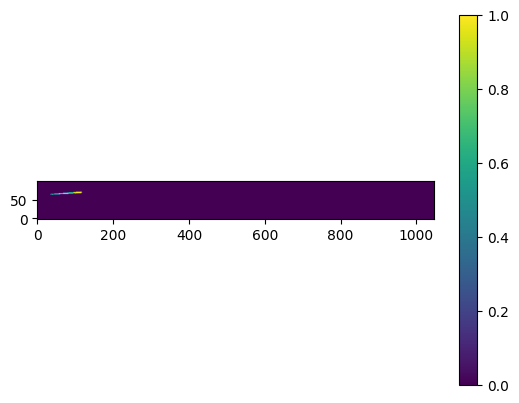

In [53]:
event_mask=np.invert(label_1==0)
plt.imshow(event_mask)
plt.colorbar()

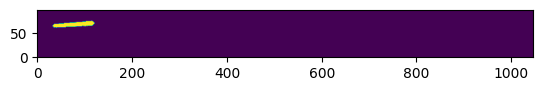

In [54]:
mask_dilation=ndimage.binary_dilation(event_mask,iterations=3)
plt.imshow(mask_dilation)

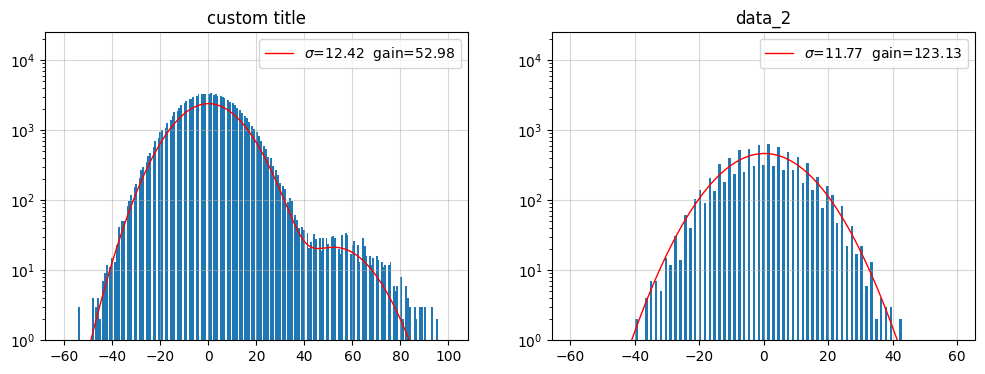

'ok'

In [62]:
ana.fit2regions(dataFits_AA-np.median(dataFits_AA), dataFits_OS-np.median(dataFits_OS), range_1=(-60,100),range_2=(-60,60),default_1=(0,4,1000,50,100), title_1="custom title")

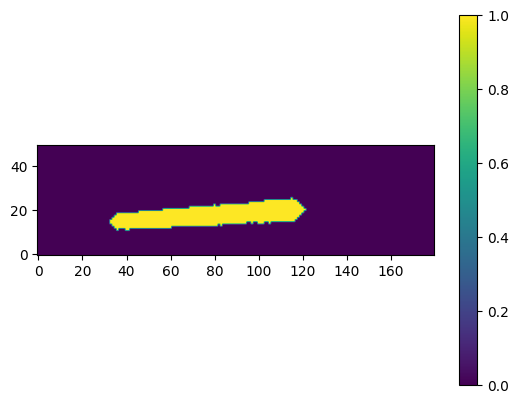

In [55]:
masked=masking(mask_dilation)
#la_mascara=ma.masked_array(data_copy, mask=serialRegisterEvents_n5)
plt.imshow(masked[50:,:180])
plt.colorbar()

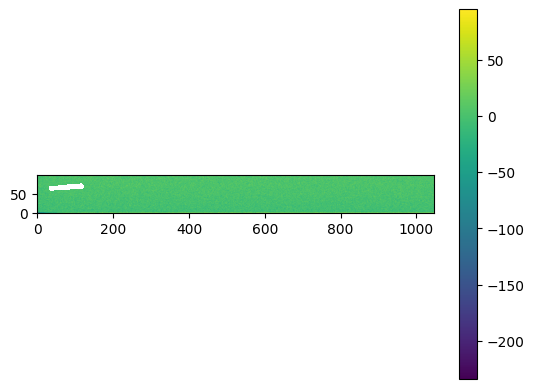

In [56]:
plt.imshow(enmascarado(dataFits_1, mask=mask_dilation))
plt.colorbar()

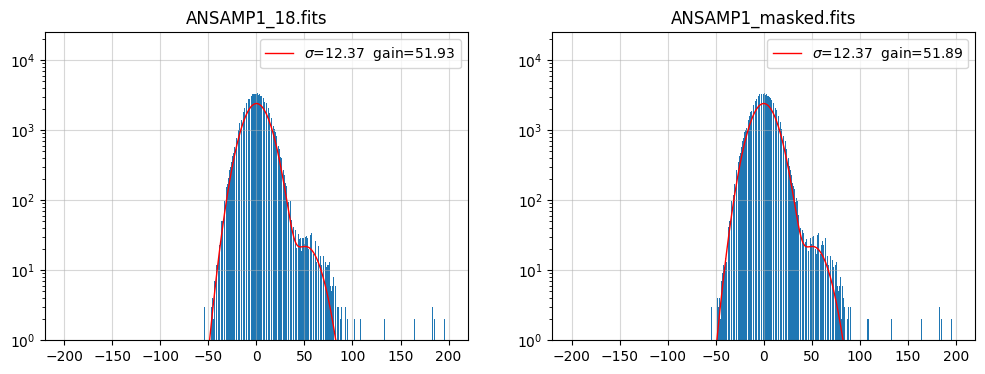

'ok'

In [57]:
ana.fit2regions(dataFits_1, enmascarado(dataFits_1, mask=mask_dilation),range_1=(-200,200), range_2=(-200,200),title_1="ANSAMP1_18.fits", title_2="ANSAMP1_masked.fits",saveFig=False)

median raw [1]= 24863.0
median [0]= 24919.000000
median [1]= 25173.000000
median [2]= 25337.000000
median [3]= 25559.000000
median [4]= 24588.000000
median [5]= 24888.000000
median [6]= 25167.000000
median [7]= 25280.000000
median [8]= 24251.000000
median [9]= 24616.000000
median [10]= 24907.000000
median [11]= 25134.000000
median [12]= 23898.000000
median [13]= 24203.000000
median [14]= 24427.000000
median [15]= 24858.000000
ansamp= 1


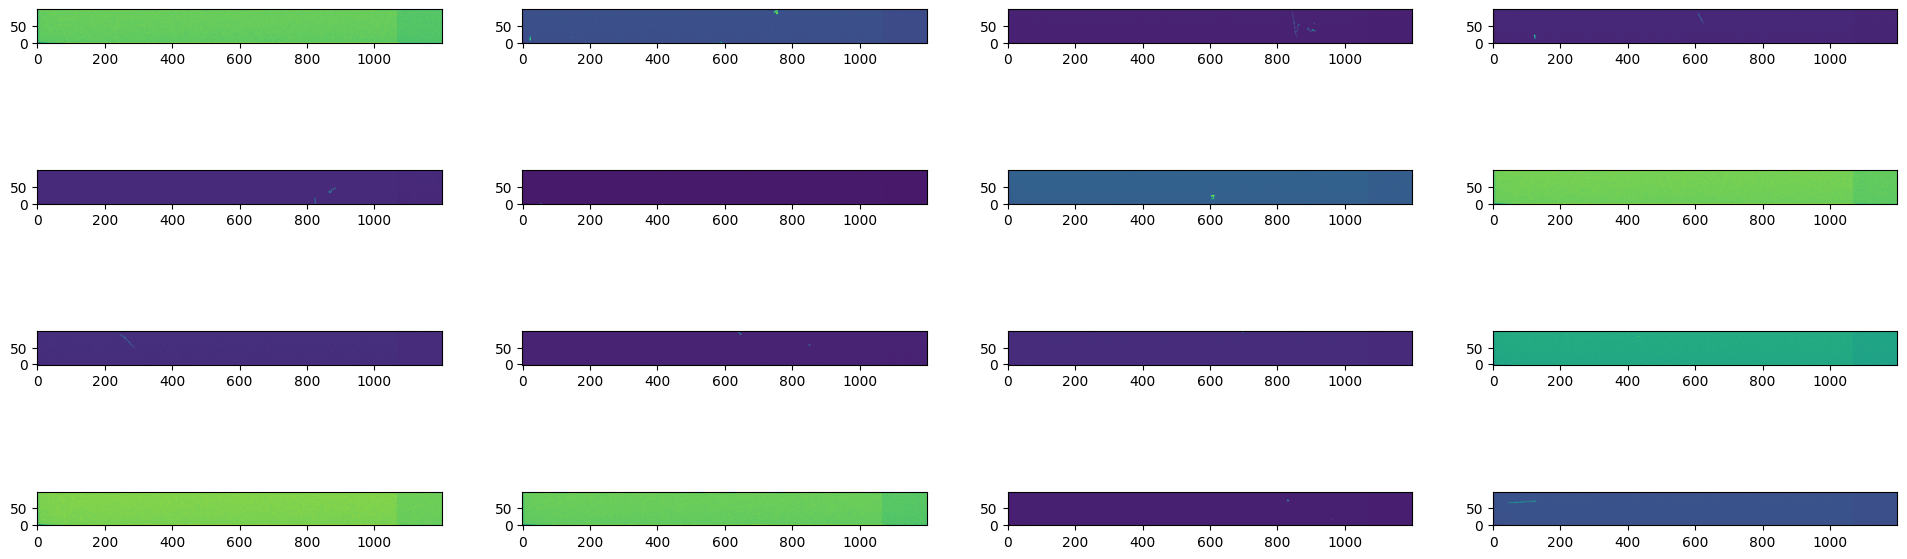

In [80]:
OHDU_Proc = (OHDU_File[1].data[active_mask]-np.median(OHDU_File[1].data[active_mask]))
print("median raw [1]= "+ str(np.median(OHDU_File[i+1].data)) )
plt.figure(figsize=(24,8))
for i in range(nCCDs):
    
    plt.subplot(4,4,i+1)
    #dataFits=(OHDU_File[1+i].data[active_mask])-np.median(OHDU_File[i+1].data[active_mask])
    dataFits=OHDU_File[1+i].data
    print("median [{:d}]= {:f}".format(i,np.median(dataFits[i+1].data)))
    plt.imshow(dataFits)#, vmin=-50, vmax=100) # media sustracted
    # plt.title('MCM1 – ohdu = {:d}'.format(i+1))

print("ansamp= "+OHDU_File[1].header['ANSAMP'])

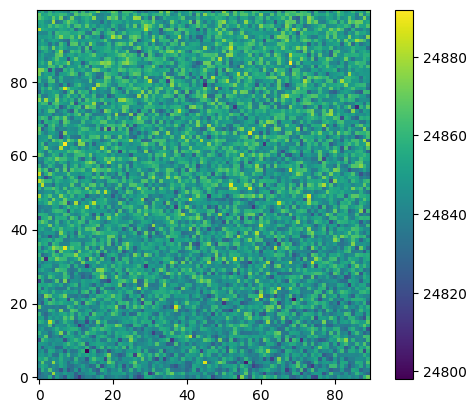

In [81]:
ANSAMP=int(OHDU_File[1].header["ANSAMP"])
dataFits_AA=dataFits[active_mask]/ANSAMP
dataFits_OS=dataFits[overscan_mask]/ANSAMP
plt.imshow(dataFits_OS)
plt.colorbar()

In [83]:
AA=dataFits_AA-np.median(dataFits_AA)
OS=dataFits_OS-np.median(dataFits_OS)

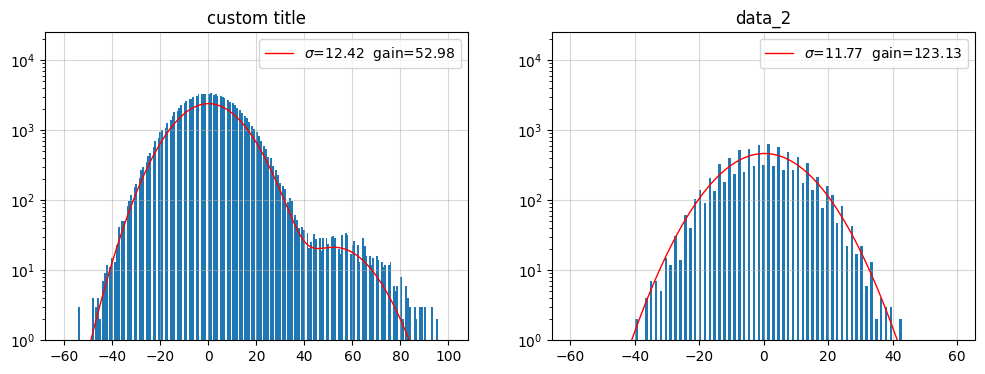

'ok'

In [84]:
ana.fit2regions(AA, OS , range_1=(-60,100),range_2=(-60,60),default_1=(0,4,1000,50,100), title_1="custom title")